In [60]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

# Load the data 
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)


## TASK 4 - Generate descriptive statistics and visualizations

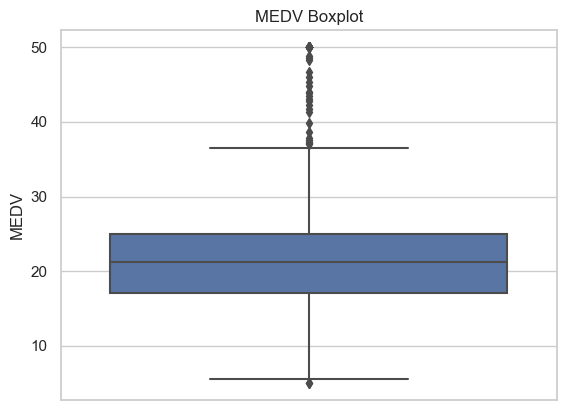

In [39]:
# Generate a boxplot od the median value of owner-occupied homes
box = sns.boxplot(y = 'MEDV', data = boston_df).set(title = 'MEDV Boxplot')


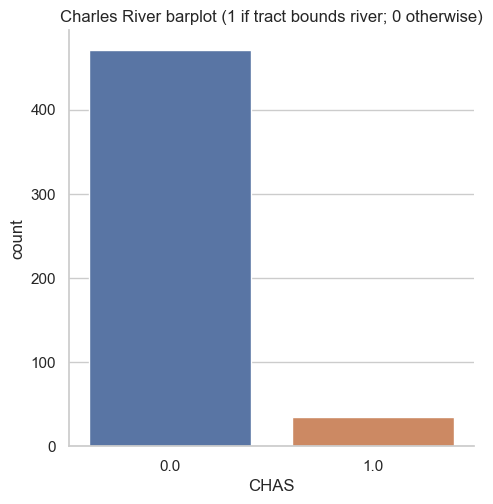

In [40]:
# Provide a bar plot for the Charles river variable
sns.set(style = 'whitegrid')

bar = sns.catplot( x = 'CHAS', kind = 'count', data = boston_df).\
set(title = 'Charles River barplot (1 if tract bounds river; 0 otherwise)')

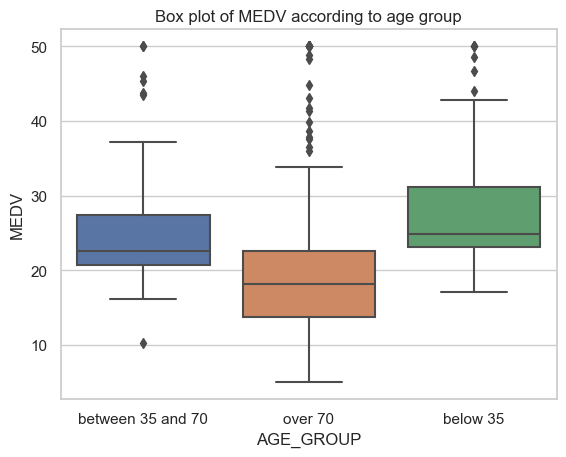

In [50]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = 'below 35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP']  = 'over 70'

box2 = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df)\
.set(title = 'Box plot of MEDV according to age group')


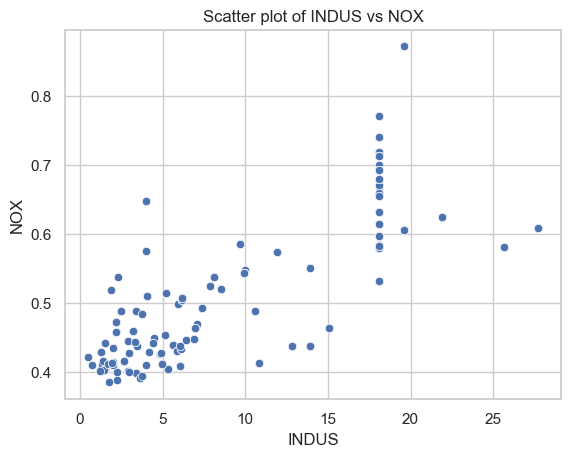

In [51]:
scatter = sns.scatterplot( x = 'INDUS', y = 'NOX', data = boston_df)\
.set(title = 'Scatter plot of INDUS vs NOX')

C:\Users\NtGNB\AppData\Local\Temp\ipykernel_9700\3837582872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot( boston_df['PTRATIO'], kde = False)\


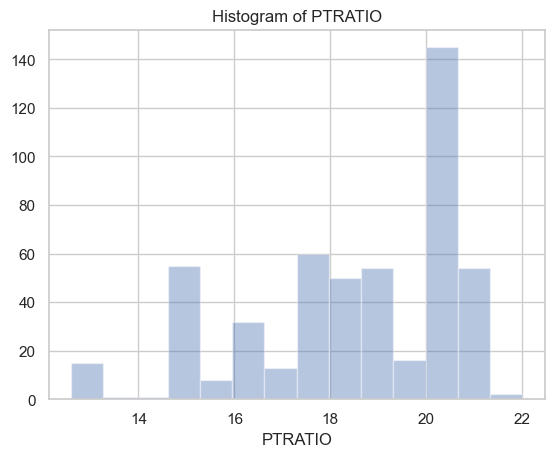

In [52]:
hist = sns.distplot( boston_df['PTRATIO'], kde = False)\
.set(title = 'Histogram of PTRATIO')

## TASK 5 - Use the appropriate tests to answer the questions provided.

### Hypothesis T-test
Ho: there is no significant difference in median values of houses bounded by Charls river \
H1: there is significant difference in median values of houses bounded by Charls river

In [56]:
#Is there a significant difference in median value of houses bounded by the Charles river
#or not? (T-test for independent samples)
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'], \
                   boston_df[boston_df['CHAS']==1]['MEDV'])

# Levene's test results in a p-value of 0.03 which means that the variances of the two groups
# are not equal

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], \
                     boston_df[boston_df['CHAS']==1]['MEDV'], equal_var = False)

# the p-value is smaller that the significance level of a=0.05 thus there is a significant difference
# between the median value of houses bounded by the Charles river

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

### Hypothesis ANOVA
Ho: There is no difference in the means of MEDV between the three age groups \
H1: There is at least one group that has a mean of MEDV significantly different \

In [55]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner 
# occupied units built prior to 1940 (AGE)? (ANOVA)

below_35_median = boston_df[boston_df['AGE_GROUP'] == 'below 35']['MEDV']
between_35_70_median = boston_df[boston_df['AGE_GROUP']=='between 35 and 70']['MEDV']
over_70_median = boston_df[boston_df['AGE_GROUP'] =='over 70']['MEDV']

fstatistic, pvalue = scipy.stats.f_oneway(below_35_median, between_35_70_median, over_70_median)
print("F-statistic: {0}, and p-value: {1}".format(fstatistic,pvalue))

# Since the p- value is way smaller than the significance level we reject the null hypothesis
# and we can safely say that at least one of the groups has different MEDV

F-statistic: 36.40764999196599, and p-value: 1.7105011022702984e-15


## Hypothesis Pearson's correlation
Ho: There is no correlation between the NOX and INDUS \
H1: There is a correlation between the NOX and INDUS 

In [57]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and 
#proportion of non-retail business acres per town? (Pearson Correlation) 

# We already did a scater plot in the previous task so we can procced with the testing. 

scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

# We see that the p-value is way smaller than a=0.05 so there is significant correlation 
# between INDUS and NOX

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

### Hypothesis Regression analysis
Ho: There is no impact of weighted distance to the five Boston employment centres on MEDV \
H1: There is an impact of weighted distance to the five Boston employment centres on MEDV

In [66]:
#What is the impact of an additional weighted distance  to the five Boston employment centres 
#on the median value of owner occupied homes? (Regression analysis)

# Create the dependent and explanatory variable
y = boston_df['MEDV']
X = boston_df['DIS']

X = sm.add_constant(X)

# Create the llinear model 
mdl = sm.OLS(y,X).fit()
prediction = mdl.predict()

# Summarize the results
mdl.summary()


# As we see from row DIS and column P>|t| which illustates the p-value, the p-value is lower than
# a =0.05 so DIS is actually having a positive impact on MEDV (positive linear dependence)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        16:39:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""